# IC 4.10. Visualization & Aggregating Variables

### 0. List of Contents
#### 1. Importing Libraries and Dataframes
#### 2. Visualization to Show the distribution of Profiles
#### 3. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### 4. Comparing customer profiles with regions and departments

### 1. Importing Libraries and Dataframes

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'/Users/fruzsinasari/Documents/Fru Python/Instacart Basket Analysis/'

In [4]:
# Importing latest version of the df
final = pd.read_pickle(os.path.join(path,'02 Data' ,'Prepared Data', 'final.pkl'))

In [4]:
#displaying max columns with pd.set_option
pd.set_option('display.max_columns',None)

In [5]:
# Reviewing content of df with head 
final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_period_of_day,max_order,loyalty_flag,avg_price_per_user,spending_flag,median_prior_order,frequent_customer_flag,Gender,STATE,Age,date_joined,add_ppl_in_household,fam_status,income,REGION,age_group,income group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Lower-middle class
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Lower-middle class
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Lower-middle class
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Lower-middle class
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Lower-middle class


### 2. Visualization to Show the distribution of Profiles

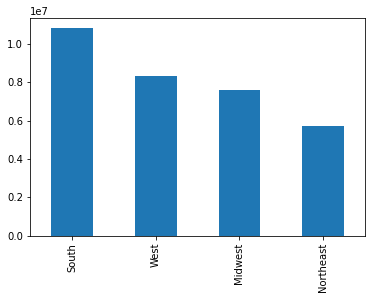

In [8]:
bar_region=final['REGION'].value_counts().plot.bar()

In [11]:
bar_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region.png'))

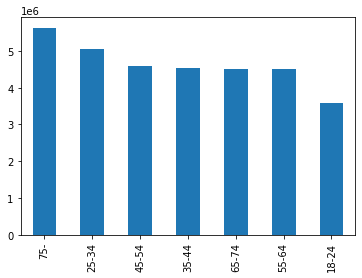

In [12]:
bar_age_group=final['age_group'].value_counts().plot.bar()

In [13]:
bar_age_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_rage_group.png'))

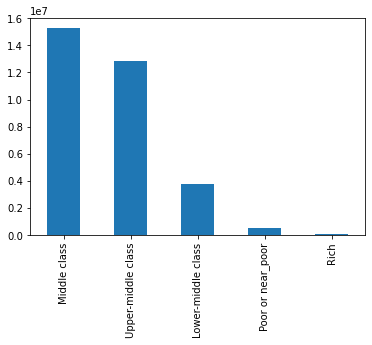

In [15]:
bar_income_group=final['income group'].value_counts().plot.bar()

In [16]:
bar_income_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_group.png'))

### 3. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [18]:
#Usage frequency per region
final.groupby('REGION').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                  mean min max
REGION                        
Midwest      16.924504   1  99
Northeast    17.215729   1  99
South        17.150270   1  99
West         17.279387   1  99

In [20]:
#Expenditure per region
final.groupby('REGION').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
REGION                        
Midwest    7.792584  1.0  25.0
Northeast  7.782409  1.0  25.0
South      7.794918  1.0  25.0
West       7.790355  1.0  25.0

In [21]:
#Usage frequency per age group
final.groupby('age_group').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                  mean min max
age_group                     
18-24        17.283007   1  99
25-34        17.007185   1  99
35-44        17.234138   1  99
45-54        17.201147   1  99
55-64        17.092004   1  99
65-74        17.075431   1  99
75-          17.143846   1  99

In [22]:
#Expenditure per age group
final.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
age_group                     
18-24      7.790869  1.0  25.0
25-34      7.782068  1.0  25.0
35-44      7.791238  1.0  25.0
45-54      7.788894  1.0  25.0
55-64      7.793321  1.0  25.0
65-74      7.802441  1.0  25.0
75-        7.789580  1.0  25.0

In [23]:
#Usage frequency per income group
final.groupby('income group').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                           mean min max
income group                           
Lower-middle class    16.110844   1  99
Middle class          17.285712   1  99
Poor or near_poor     15.461189   1  99
Rich                  18.838912   1  99
Upper-middle class    17.334689   1  99

In [24]:
#Expenditure per income group
final.groupby('income group').agg({'prices': ['mean', 'min', 'max']})

prices           
                        mean  min   max
income group                           
Lower-middle class  6.869670  1.0  25.0
Middle class        7.921964  1.0  25.0
Poor or near_poor   6.499623  1.0  25.0
Rich                7.751901  1.0  25.0
Upper-middle class  7.958847  1.0  25.0

### 4. Comparing customer profiles with regions and departments

In [27]:
# crosstab of region and age group

xtab_age_group_region = pd.crosstab(final['age_group'], final['REGION'], dropna = False)

In [28]:
xtab_age_group_region

REGION,Midwest,Northeast,South,West
age_group,,,,
18-24,828365,631126,1219420,897498
25-34,1176039,906051,1681576,1295656
35-44,1084109,761371,1553652,1151573
45-54,1089380,821078,1498104,1186660
55-64,1048127,779160,1515433,1162360
65-74,1055782,825540,1475335,1153678
75-,1322214,1004118,1858462,1453192


In [29]:
# crosstab of region and income group
xtab_income_group_region = pd.crosstab(final['income group'], final['REGION'], dropna = False)

In [30]:
xtab_income_group_region

REGION,Midwest,Northeast,South,West
income group,,,,
Lower-middle class,875547,678444,1270715,943321
Middle class,3532609,2672303,5101487,3953989
Poor or near_poor,125646,85873,183291,129448
Rich,19561,10203,14874,14814
Upper-middle class,3050653,2281621,4231615,3259045


In [32]:
# crosstab of department_id and age group
xtab_age_group_dep = pd.crosstab(final['department_id'], final['age_group'], dropna = False)

In [33]:
xtab_age_group_dep

age_group,18-24,25-34,35-44,45-54,55-64,65-74,75-
department_id,,,,,,,
1.0,246369,345443,310429,317196,310871,311487,392948
2.0,4100,5770,4980,5274,5050,4946,6171
3.0,129306,183446,163636,165585,162527,161761,206167
4.0,1043171,1477061,1341888,1337590,1317566,1325954,1636061
5.0,18557,24064,20942,23232,21820,20980,24101
6.0,30073,42566,37861,38600,36594,37153,46406
7.0,292004,416097,371696,385833,377310,374522,470661
8.0,11925,14453,13816,13300,13774,14110,16338
9.0,96651,135212,120553,121510,120443,120915,151343


In [35]:
# crosstab of price_range_loc and age group
xtab_age_group_price_range = pd.crosstab(final['price_range_loc'], final['age_group'], dropna = False)

In [36]:
xtab_age_group_price_range

age_group,18-24,25-34,35-44,45-54,55-64,65-74,75-
price_range_loc,,,,,,,
High-range product,46330,64534,57898,59040,58028,59119,72729
Low-range product,1115801,1581596,1419367,1434869,1407129,1406102,1761457
Mid-range product,2410870,3408524,3069366,3097015,3035399,3041213,3798473


In [38]:
# crosstab of price_range_loc and region
xtab_region_price_range = pd.crosstab(final['price_range_loc'], final['REGION'], dropna = False)

In [39]:
xtab_region_price_range

REGION,Midwest,Northeast,South,West
price_range_loc,,,,
High-range product,97918,73202,139390,107168
Low-range product,2372304,1792943,3368338,2592736
Mid-range product,5127103,3856591,7284157,5593009


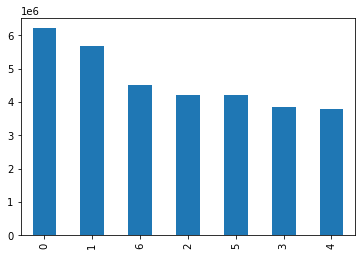

In [7]:
#number of orders per dow was missing
orders_dow=final['orders_day_of_week'].value_counts().plot.bar()

In [8]:
orders_dow.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','barorders_dow.png'))

In [10]:
xtab_hours_days = pd.crosstab(final['orders_day_of_week'], final['order_hour_of_day'], dropna = False)

In [11]:
xtab_hours_days

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
orders_day_of_week,,,,,,,,,,,,,,,,,,,,,
0,38877,22524,12725,8851,8372,11632,34987,133396,306505,441303,...,564910,552077,501618,395722,284523,217352,183832,153143,120830,71001
1,37115,18296,10817,7114,7673,14422,52778,165445,333339,506149,...,453200,442892,418575,337904,259449,199129,152131,119967,91851,57272
2,29914,14711,8339,7026,6802,12749,43817,122481,224052,329228,...,335119,334076,330938,277633,226830,170808,130900,102845,80320,52617
3,27525,13563,8666,5777,6840,11740,40952,110705,198423,278171,...,304328,314276,306402,261113,213283,164341,122270,100593,81471,50179
4,24719,13530,7979,6330,6924,12009,39837,113506,194150,270029,...,297003,299371,298257,254098,207528,169011,130612,108395,89473,54667
5,29521,14962,9518,8325,8738,14731,46289,128874,224156,315031,...,345983,343151,327206,270660,217749,166976,126001,99216,78854,54041
6,31280,18201,11391,7898,7935,10781,32136,117544,239366,316840,...,391055,378740,354510,292380,228594,171799,131303,112220,91944,62844


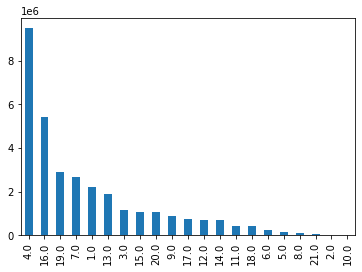

In [12]:
#order frequency by dep id was missing
bar_dep=final['department_id'].value_counts().plot.bar()

In [13]:
bar_dep.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dep.png'))

In [15]:
# crosstab of price_range_loc and region
xtab_loyalty_price_range = pd.crosstab(final['loyalty_flag'], final['price_range_loc'], dropna = False)

In [16]:
xtab_loyalty_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Inactive Customer,19725,451479,969085
Loyal customer,119936,3214690,6949467
New customer,65927,1501290,3236484
Regular customer,212090,4958862,10705824


In [17]:
#Usage frequency per family status
final.groupby('fam_status').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                                         mean min max
fam_status                                           
divorced/widowed                    17.275010   1  99
living with parents and siblings    17.296007   1  99
married                             17.087738   1  99
single                              17.259446   1  99